From [this website](https://miamioh.instructure.com/courses/38817/pages/regression).

[Here is a comparison](https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/) between [sklearn](https://scikit-learn.org/stable/) and [ols](https://www.statsmodels.org/stable/index.html).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

First import the dataset mtcars and turn it into a dataframe with pandas:

In [ ]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from patsy import dmatrix


mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Some useful exploratory commands:

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

                    mpg  cyl   disp   hp  drat  ...   qsec  vs  am  gear  carb
Mazda RX4          21.0    6  160.0  110  3.90  ...  16.46   0   1     4     4
Mazda RX4 Wag      21.0    6  160.0  110  3.90  ...  17.02   0   1     4     4
Datsun 710         22.8    4  108.0   93  3.85  ...  18.61   1   1     4     1
Hornet 4 Drive     21.4    6  258.0  110  3.08  ...  19.44   1   0     3     1
Hornet Sportabout  18.7    8  360.0  175  3.15  ...  17.02   0   0     3     2

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non

Text(0.5, 1.0, 'Disp vs mpg')

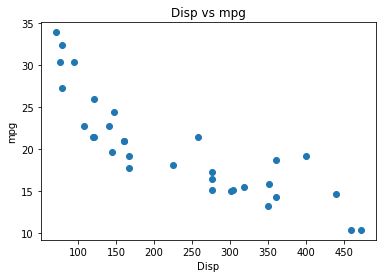

In [ ]:
plt.scatter(df['disp'],df['mpg'])
plt.xlabel('Disp')
plt.ylabel('mpg')
plt.title('Disp vs mpg')

In [ ]:
df.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [ ]:
df.keys()[0]

'mpg'

In [ ]:
df['mpg']

Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64

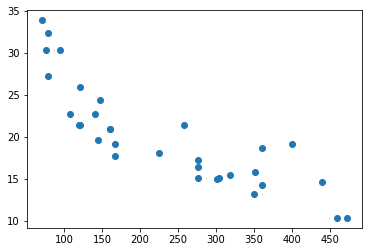

In [ ]:
plt.scatter(df['disp'],df['mpg'])

Doing linear regression requires a matrix, apparently:

In [ ]:
print(df.keys()[0], df.keys()[3])

mpg hp


In [ ]:
# So the following regresses mpg ~ hp:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

mat = np.matrix(df)

lmFit = lm.fit(mat[:,3], mat[:,0])

print(lmFit.coef_)
print(lmFit.intercept_)

[[-0.06822828]]
[30.09886054]


In [ ]:
# The following is incorrect!!!!

X,y = df[['mpg']], df.hp

lmFit2 = lm.fit(X,y)

print(lmFit2.coef_)
print(lmFit2.intercept_)

[-8.82973099]
324.08231421252054


In [ ]:
#R squared
lmFit2.score(X, y)

0.602437341423934

In [ ]:
#Adjusted R square

yhat = lmFit2.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.602437341423934 0.5891852528047318


In [ ]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

mat = dmatrix("disp + qsec + C(cyl)", mtcars)

X = pd.DataFrame(mat[:,1:],columns = mat.design_info.column_names[1:])

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,mtcars['mpg'])

pd.Series(model.coef_,index = X.columns)

C(cyl)[T.6]   -5.087564
C(cyl)[T.8]   -5.535554
disp          -0.025860
qsec          -0.162425
dtype: float64

Same for multiple regression:

In [ ]:
lmm = LinearRegression()
wt = np.array(df['wt'])
cyl = np.array(df['cyl'])
carb = np.array(df['carb'])
stack = np.column_stack((cyl,wt,carb))
stackmat = np.matrix(stack)

lmFit2 = lmm.fit(stackmat,mat[:,4])
print(lmFit2.coef_)
print(lmFit2.intercept_)

Here is the equivalent for lasso:

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(stackmat, mat[:,4])

In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

Lasso is equivalent to OLS if alpha is zero (same coefficients):

In [ ]:
lasso = Lasso(alpha=0)
lasso.fit(stackmat, mat[:,4])

print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

In [ ]:
# Build dataset
UVLevel = np.array((0.01,1,0.23,0.00,0.16,0.16,0.09,0.23,0.01,0.00,0.57,0.16,1.00,0.01,1,0.4,0.78,0.23,0.4,00)).reshape((20,1))
Survived = np.array((0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0))
df = pd.DataFrame(UVLevel, Survived)
y, X = dmatrices("Survived~UVLevel", df, return_type="dataframe")

# Construct regression object and print coefficients
lgr = LogisticRegression(fit_intercept=False, C=1e9)
lgrm = lgr.fit(X,y)
print('Coefficients: \n', lgrm.coef_, '    ', lgrm.intercept_)

# Construct a generalized linear model and print information
smGLM = sm.GLM(y, X, family=sm.families.Binomial())
res = smGLM.fit()
print(res.summary())

In [ ]:
import numpy as np
from statsmodels.stats import anova
model = smf.ols(formula='np.log(mpg) ~ np.log(wt)', data=mtcars).fit()
print(anova.anova_lm(model))
print(anova.anova_lm(model).F["np.log(wt)"])

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

In [ ]:
from   statsmodels.formula.api import ols

In [ ]:
reg = ols('sepal_length ~ C(species) + petal_width', data=iris).fit()
print(reg.summary())
print(dir(reg))